In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
ts = df['meantemp']

In [3]:
ts_diff = ts.diff().dropna()

<Figure size 1200x400 with 0 Axes>

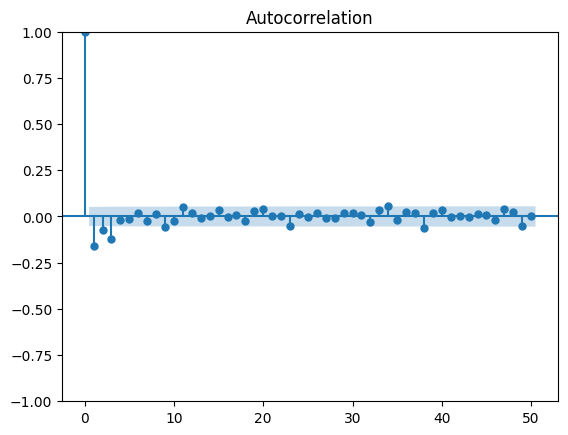

<Figure size 1200x400 with 0 Axes>

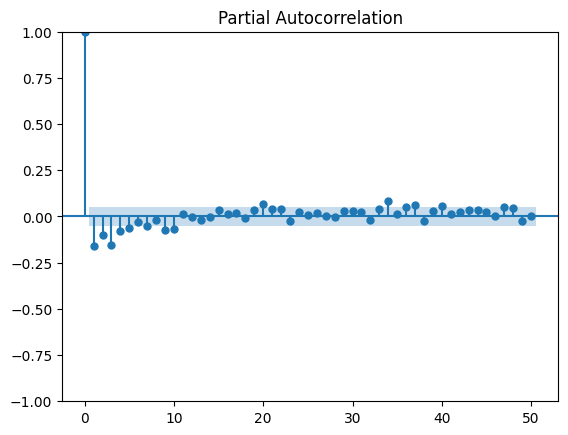

In [4]:
plt.figure(figsize=(12,4))
plot_acf(ts_diff, lags=50)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(ts_diff, lags=50)
plt.show()

In [5]:
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2767.166
Date:                Thu, 13 Nov 2025   AIC                           5544.332
Time:                        11:26:00   BIC                           5570.767
Sample:                    01-01-2013   HQIC                          5554.193
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2627      0.198     -1.327      0.185      -0.651       0.125
ar.L2          0.5043      0.098      5.136      0.000       0.312       0.697
ma.L1          0.0231      0.200      0.116      0.9

In [6]:
forecast = model_fit.forecast(steps=30)
print(forecast)

2017-01-02    11.363143
2017-01-03    12.053028
2017-01-04    12.559183
2017-01-05    12.774101
2017-01-06    12.972879
2017-01-07    13.029035
2017-01-08    13.114521
2017-01-09    13.120381
2017-01-10    13.161949
2017-01-11    13.153984
2017-01-12    13.177038
2017-01-13    13.166965
2017-01-14    13.181237
2017-01-15    13.172408
2017-01-16    13.181925
2017-01-17    13.174972
2017-01-18    13.181597
2017-01-19    13.176351
2017-01-20    13.181070
2017-01-21    13.177185
2017-01-22    13.180585
2017-01-23    13.177733
2017-01-24    13.180197
2017-01-25    13.178111
2017-01-26    13.179902
2017-01-27    13.178379
2017-01-28    13.179682
2017-01-29    13.178572
2017-01-30    13.179521
2017-01-31    13.178712
Freq: D, Name: predicted_mean, dtype: float64


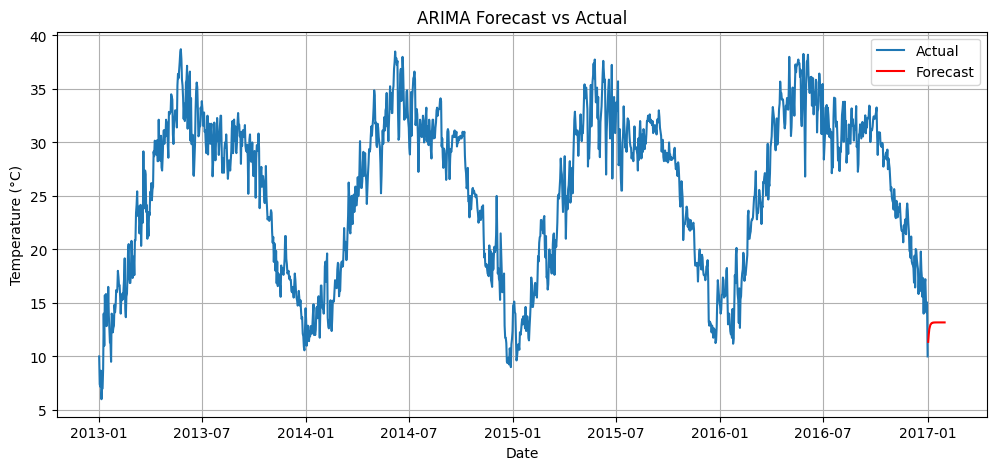

In [7]:
plt.figure(figsize=(12,5))
plt.plot(ts, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()